In [1]:
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv.git

Cloning into 'Faster_RCNN_Opencv'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 8
Unpacking objects: 100% (18/18), 57.35 MiB | 6.71 MiB/s, done.
Updating files: 100% (6/6), done.


https://www.youtube.com/watch?v=eZA_G-3O-i4

In [2]:
import numpy as np
import random
import time
import cv2
import os
from google.colab.patches import cv2_imshow

In [3]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

weightsPath = "/content/Faster_RCNN_Opencv/frozen_inference_graph.pb"
configPath = "/content/Faster_RCNN_Opencv/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [4]:
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

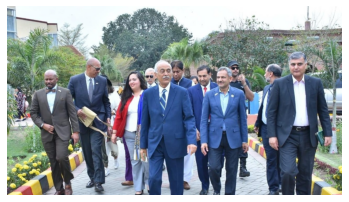

In [28]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Download the image using requests
url = "https://github.com/ArslanKAS/AI_Apps/blob/main/UAF_VC.jpg?raw=true"
response = requests.get(url)
img_data = response.content

# Read the image data using OpenCV
img_array = np.asarray(bytearray(img_data), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [30]:
# image = cv2.imread(img)
# image = cv2.imread("/content/Faster_RCNN_Opencv/doggo.jpg")
(H, W) = img.shape[:2]

In [31]:
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)
net.setInput(blob)

In [32]:
boxes = net.forward(["detection_out_final"])
output = boxes[0].squeeze()
output[: , 3:][:5]

array([[0.7591036 , 0.23699635, 0.9776191 , 0.9913364 ],
       [0.07330339, 0.3253994 , 0.21398598, 0.99677277],
       [0.39124376, 0.2912999 , 0.55632776, 1.        ],
       [0.30835873, 0.33570105, 0.4164853 , 0.95843154],
       [0.5710269 , 0.31990215, 0.7310903 , 0.9952731 ]], dtype=float32)

In [33]:
num = np.argwhere(output[: , 2] > 0.8).shape[0]

In [34]:
font = cv2.FONT_HERSHEY_SIMPLEX

# img = cv2.imread("/content/Faster_RCNN_Opencv/doggo.jpg")
for i in range(num):
  x1n , y1n , x2n , y2n = output[i , 3:]
  x1 = int(x1n * W)
  y1 = int(y1n * H)
  x2 = int(x2n * W)
  y2 = int(y2n * H)
  img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 3)
  class_name = coco_names[int(output[i , 1])]
  img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 , 
                    (255 , 0 , 0) , 1 , cv2.LINE_AA)

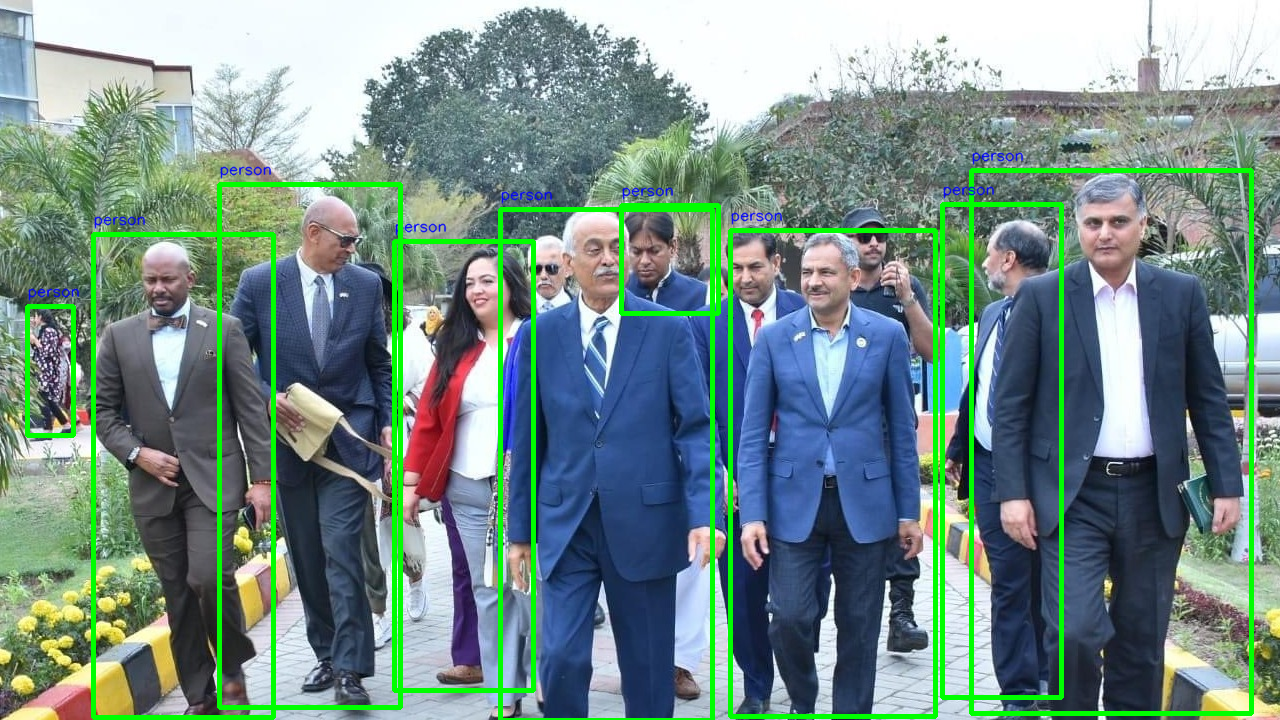

In [36]:
cv2_imshow(img)